In [1]:
import os, sys
import numpy as np
import h5netcdf

import xarray as xr
import xarray.ufuncs as xu
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

plt.rc("figure", figsize=(16,4))
plt.rc("font", size=14)
ccrs.PlateCarree()

from dask.distributed import Client, LocalCluster
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4)
client = Client(cluster)
client



Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:8787/status,
Dashboard: http://137.129.155.67:8787/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: inproc://137.129.155.67/8904/1,Workers: 1
Dashboard: http://137.129.155.67:8787/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: inproc://137.129.155.67/8904/4,Total threads: 4
Dashboard: http://137.129.155.67:34625/status,Memory: 78.61 GiB
Nanny: None,


In [3]:
indir_data_Mean = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/MEAN/TCWV/'
ds_mean = xr.open_mfdataset(indir_data_Mean + 'TCWV_mean.nc', chunks = {'time' : 1}, parallel=True)


#####################################
### Creation du masque de données ###
#####################################
indir_smot = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/SMOTHED_CLIM/'
ds_smot = xr.open_mfdataset(indir_smot+'clim_OLR_smooth_ERA5_2000_2020.nc', chunks = {'time' : 1}, parallel=True)
mask = ds_smot.mean('time').load()
ds_mean

<xarray.Dataset>
Dimensions:      (lat: 54, lon: 240)
Coordinates:
  * lat          (lat) float64 40.0 38.5 37.0 35.5 ... -35.0 -36.5 -38.0 -39.5
  * lon          (lon) float32 0.0 1.5 3.0 4.5 6.0 ... 354.0 355.5 357.0 358.5
Data variables:
    TCWV_Kelvin  (lat, lon) float64 dask.array<chunksize=(54, 240), meta=np.ndarray>
    TCWV_Rossby  (lat, lon) float64 dask.array<chunksize=(54, 240), meta=np.ndarray>
    TCWV_MJO     (lat, lon) float64 dask.array<chunksize=(54, 240), meta=np.ndarray>
    TCWV_MRG     (lat, lon) float64 dask.array<chunksize=(54, 240), meta=np.ndarray>
    TCWV_EIG     (lat, lon) float64 dask.array<chunksize=(54, 240), meta=np.ndarray>
    TCWV_WIG     (lat, lon) float64 dask.array<chunksize=(54, 240), meta=np.ndarray>
    TCWV_TD      (lat, lon) float64 dask.array<chunksize=(54, 240), meta=np.ndarray>
    TCWV_LF      (lat, lon) float64 dask.array<chunksize=(54, 240), meta=np.ndarray>

In [4]:
map_proj = ccrs.Mercator(central_longitude=180.0, 
                         min_latitude=-30.1, 
                         max_latitude=30.1,
                         globe=None)

# plt.rc("figure", figsize=(20,14))
cmap ='BrBG'
vmin, vmax = -0.010, +0.010

colorbar = {'label': 'TCWV $kg.m^{2}$',
            'orientation': 'vertical' ,
            'extend' : 'both'}


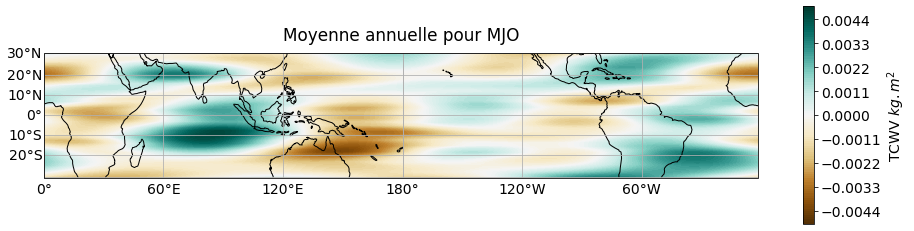

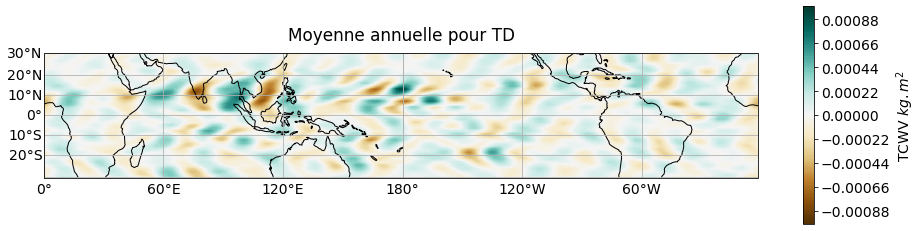

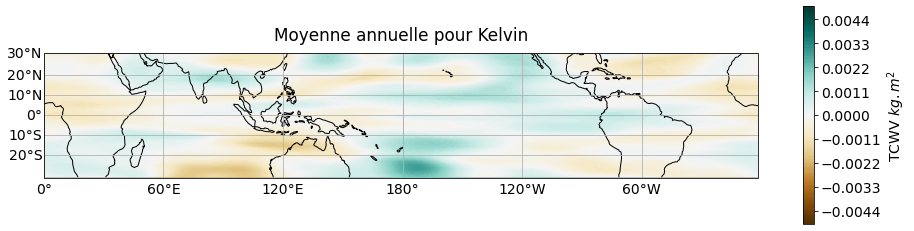

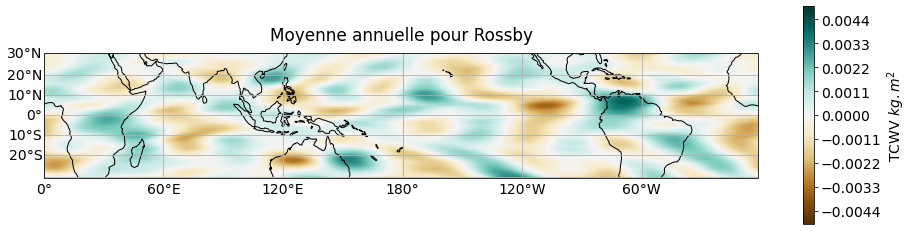

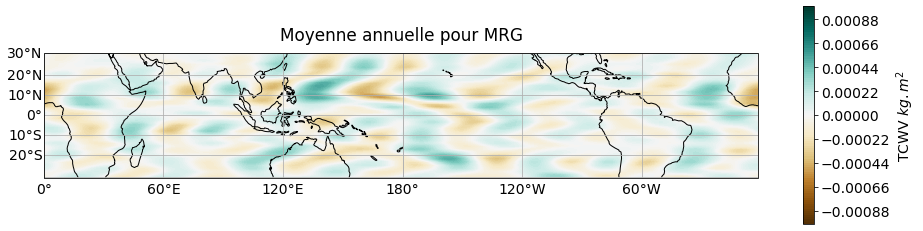

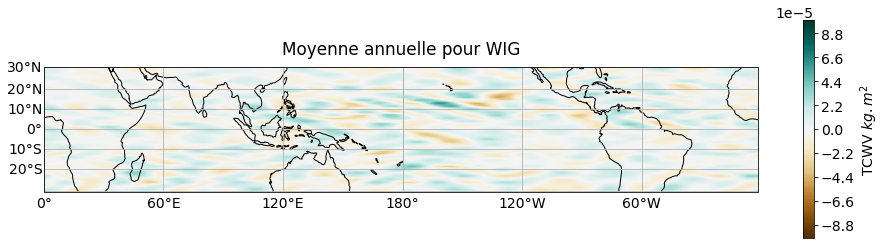

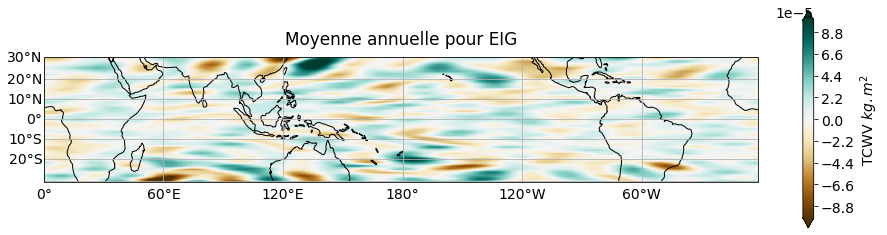

In [12]:
#####################################################################################
vmin, vmax = -0.0050, +0.005
wave = 'MJO'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne annuelle pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.0010, +0.0010
wave = 'TD'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne annuelle pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.0050, +0.0050
wave = 'Kelvin'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne annuelle pour ' + wave)
plt.show()

#####################################################################################
wave = 'Rossby'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne annuelle pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.0010, +0.0010
wave = 'MRG'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne annuelle pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.00010, +0.00010
wave = 'WIG'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne annuelle pour ' + wave)
plt.show()

#####################################################################################
wave = 'EIG'

fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne annuelle pour ' + wave)
plt.show()

# Par saison

## Pour JFM

In [15]:
indir_data_Mean = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/MEAN/TCWV/'
ds_mean = xr.open_mfdataset(indir_data_Mean + 'TCWV_mean_JFM.nc', chunks = {'time' : 1}, parallel=True)
ds_mean = ds_mean.compute()

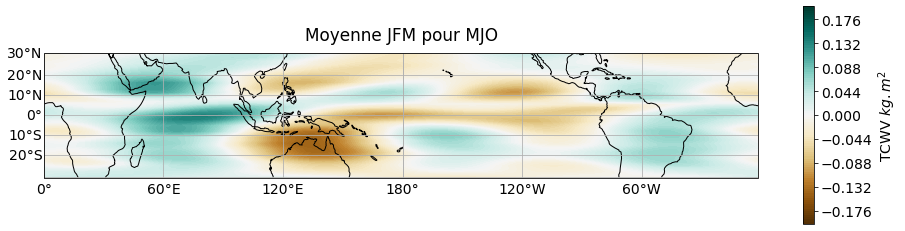

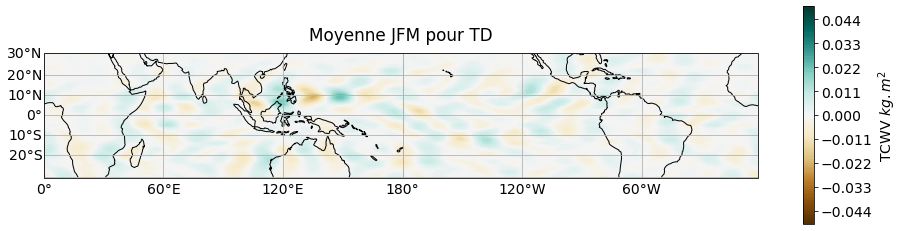

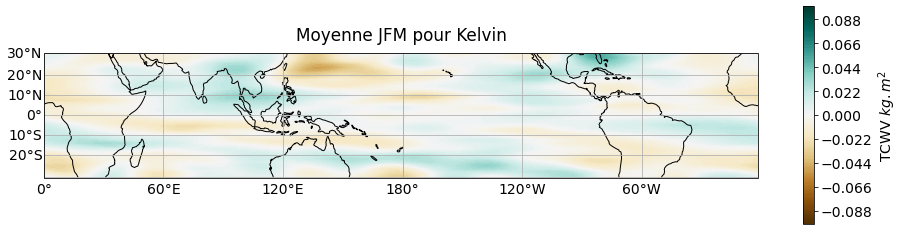

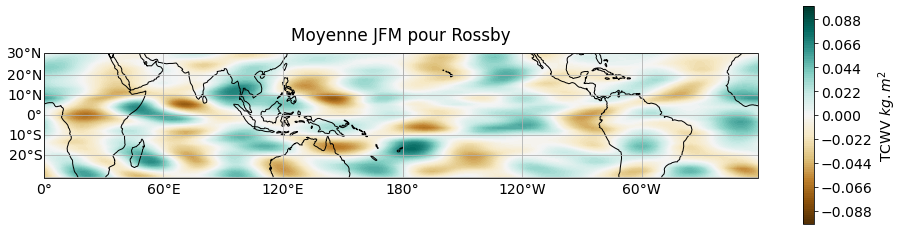

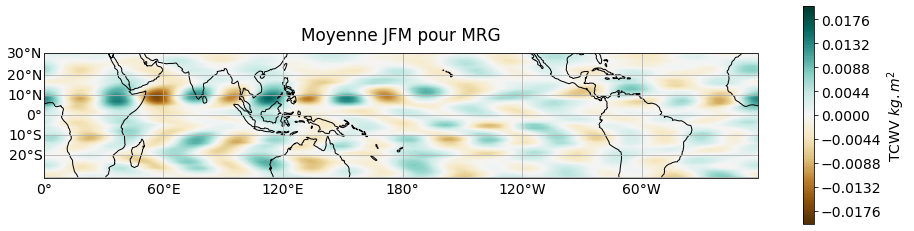

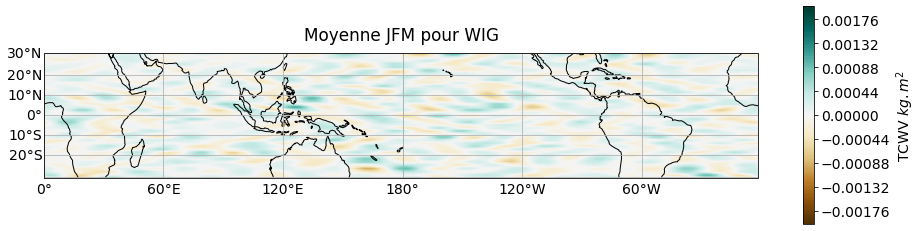

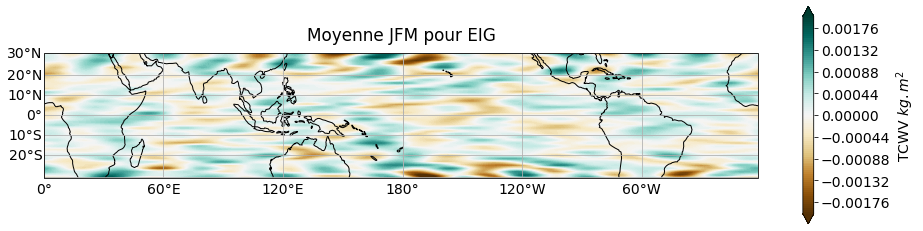

In [20]:
#####################################################################################
vmin, vmax = -0.2, +0.2
wave = 'MJO'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JFM pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.5*1e-1, +0.5*1e-1
wave = 'TD'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JFM pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.1, +0.1
wave = 'Kelvin'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JFM pour ' + wave)
plt.show()

#####################################################################################
wave = 'Rossby'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JFM pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.2*1e-1, +0.2*1e-1
wave = 'MRG'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JFM pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.2*1e-2, +0.2*1e-2

wave = 'WIG'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JFM pour ' + wave)
plt.show()

#####################################################################################
wave = 'EIG'

fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JFM pour ' + wave)
plt.show()

## Pour AMJ

In [ ]:
indir_data_Mean = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/MEAN/TCWV/'
ds_mean = xr.open_mfdataset(indir_data_Mean + 'TCWV_mean_AMJ.nc', chunks = {'time' : 1}, parallel=True)

In [ ]:
#####################################################################################
vmin, vmax = -0.2, +0.2
wave = 'MJO'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne AMJ pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.5*1e-1, +0.5*1e-1
wave = 'TD'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne AMJ pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.1, +0.1
wave = 'Kelvin'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne AMJ pour ' + wave)
plt.show()

#####################################################################################
wave = 'Rossby'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne AMJ pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.2*1e-1, +0.2*1e-1
wave = 'MRG'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne AMJ pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.2*1e-2, +0.2*1e-2

wave = 'WIG'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne AMJ pour ' + wave)
plt.show()

#####################################################################################
wave = 'EIG'

fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne AMJ pour ' + wave)
plt.show()

## Pour JAS

In [26]:
indir_data_Mean = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/MEAN/TCWV/'
ds_mean = xr.open_mfdataset(indir_data_Mean + 'TCWV_mean_JOS.nc', chunks = {'time' : 1}, parallel=True)

OSError: no files to open

In [ ]:
#####################################################################################
vmin, vmax = -0.2, +0.2
wave = 'MJO'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JAS pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.5*1e-1, +0.5*1e-1
wave = 'TD'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JAS pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.1, +0.1
wave = 'Kelvin'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JAS pour ' + wave)
plt.show()

#####################################################################################
wave = 'Rossby'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JAS pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.2*1e-1, +0.2*1e-1
wave = 'MRG'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JAS pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.2*1e-2, +0.2*1e-2

wave = 'WIG'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JAS pour ' + wave)
plt.show()

#####################################################################################
wave = 'EIG'

fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne JAS pour ' + wave)
plt.show()

## Pour OND

In [24]:
indir_data_Mean = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/MEAN/TCWV/'
ds_mean = xr.open_mfdataset(indir_data_Mean + 'TCWV_mean_OND.nc', chunks = {'time' : 1}, parallel=True)

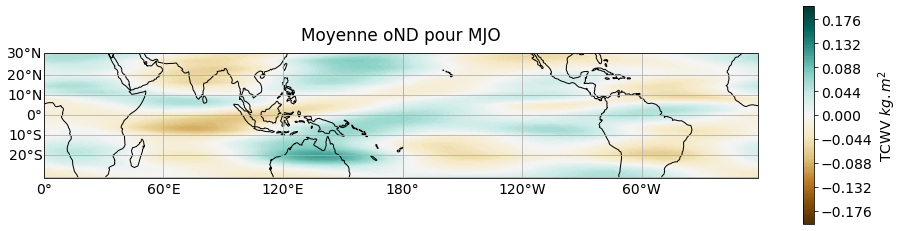

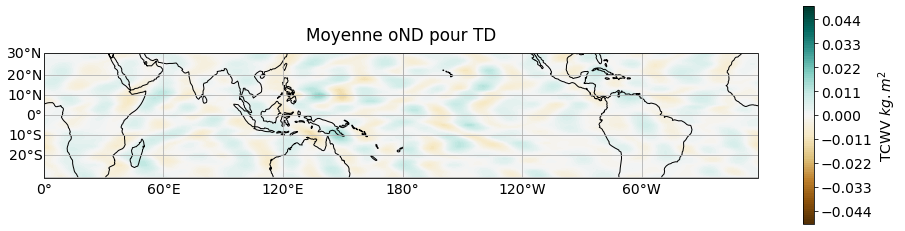

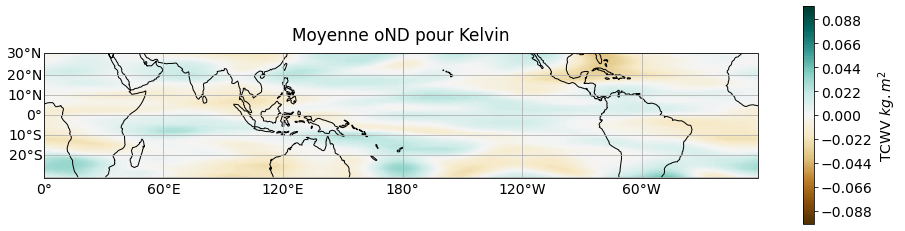

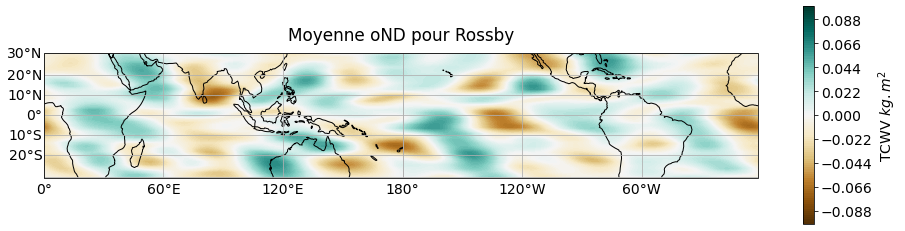

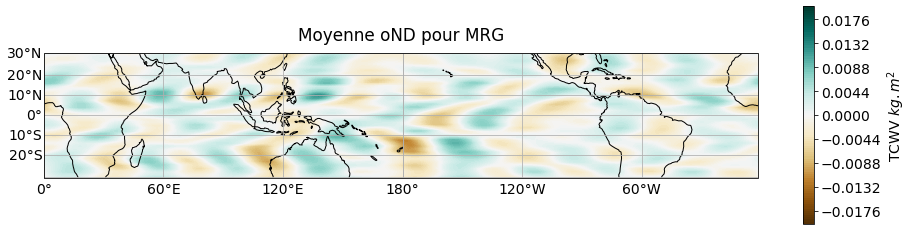

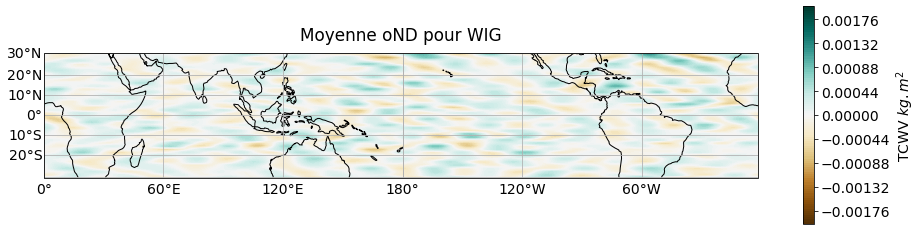

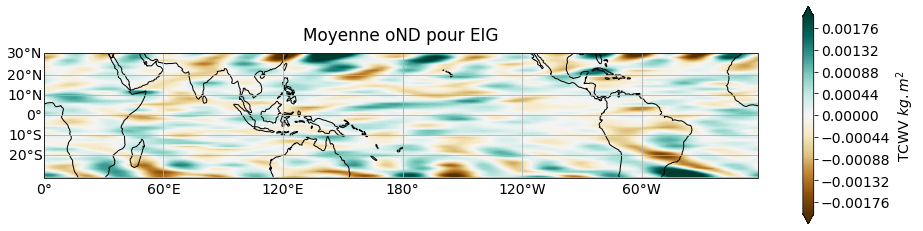

In [25]:
#####################################################################################
vmin, vmax = -0.2, +0.2
wave = 'MJO'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne oND pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.5*1e-1, +0.5*1e-1
wave = 'TD'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne oND pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.1, +0.1
wave = 'Kelvin'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne oND pour ' + wave)
plt.show()

#####################################################################################
wave = 'Rossby'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne oND pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.2*1e-1, +0.2*1e-1
wave = 'MRG'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne oND pour ' + wave)
plt.show()

#####################################################################################
vmin, vmax = -0.2*1e-2, +0.2*1e-2

wave = 'WIG'
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne oND pour ' + wave)
plt.show()

#####################################################################################
wave = 'EIG'

fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_mean['TCWV_' + wave].plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Moyenne oND pour ' + wave)
plt.show()